In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

<h1>Tournament Analysis</h1>

In [92]:
df = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Batsmen.csv', encoding='unicode_escape')
df1 = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Bowler.csv', encoding='unicode_escape')

In [93]:
df.head(5)

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7


In [94]:
df1.head(5)

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs_given,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [95]:
df.columns

Index(['Match_no', 'Match_Between', 'Team_Innings', 'Batsman_Name',
       'Batting_Position', 'Dismissal', 'Runs', 'Balls', '4s', '6s',
       'Strike_Rate'],
      dtype='object')

Now we are calculating the overall perfromance of each batsmen

In [96]:
import pandas as pd
import numpy as np

# Create a new dataframe 'bat_stat'
bat_stat = df.groupby('Batsman_Name').agg({
    'Runs': 'sum',
    'Match_no': 'nunique',  # Count unique matches
    'Dismissal': lambda x: (x != 'not out').sum(),
    'Strike_Rate': lambda x: pd.to_numeric(x.replace('---', np.nan), errors='coerce').mean()
}).reset_index()

# Calculate batting average
bat_stat['Batting_Average'] = bat_stat['Runs'] / bat_stat['Dismissal'].replace(0, np.inf)

# Rename columns
bat_stat = bat_stat.rename(columns={
    'Runs': 'Total_Runs',
    'Match_no': 'Total_Matches_Played',
    'Strike_Rate': 'Batting_StrikeRate',
    'Dismissal': 'Outs'
})

# Select and reorder columns
bat_stat = bat_stat[['Batsman_Name', 'Total_Runs', 'Total_Matches_Played', 'Batting_StrikeRate', 'Batting_Average']]

# Display the first few rows of the new dataset
print(bat_stat.head())

        Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
0  Abdullah Shafique         336                     8           71.388875   
1         Adam Zampa          59                     7           74.304571   
2        Adil Rashid          92                     9           91.632556   
3        Agha Salman          51                     1          113.333000   
4      Aiden Markram         472                    10          141.043000   

   Batting_Average  
0        42.000000  
1        14.750000  
2        15.333333  
3        51.000000  
4        39.333333  


In above we have included the Strike Rate and Batting Average for each batsmen in ICC World Cup 2023

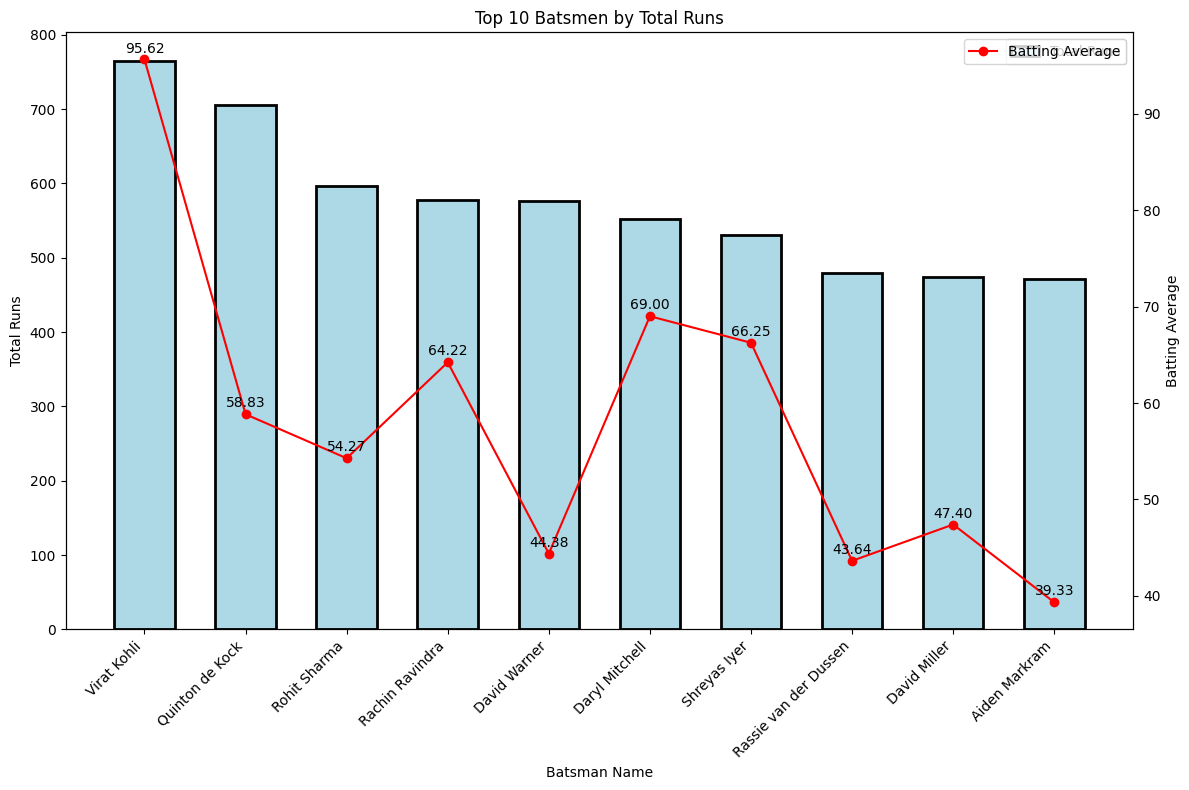

In [97]:
import matplotlib.pyplot as plt

# Sort bat_stat by Total_Runs to get top 10 batsmen
top_batsmen = bat_stat.sort_values(by='Total_Runs', ascending=False).head(10)

# Plotting Total Runs and Batting Average
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size

# Bar plot for Total Runs with adjusted width, color, and edge color
bars = ax.bar(top_batsmen['Batsman_Name'], top_batsmen['Total_Runs'], label='Total Runs', color='lightblue', edgecolor='black', linewidth=2, width=0.6)  # Adjusted bar width and styling
ax.set_xlabel('Batsman Name')
ax.set_ylabel('Total Runs')
ax.set_title('Top 10 Batsmen by Total Runs')

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align to the right for better readability

# Twin axes for Batting Average
ax2 = ax.twinx()
line = ax2.plot(top_batsmen['Batsman_Name'], top_batsmen['Batting_Average'], marker='o', color='red', label='Batting Average')

ax2.set_ylabel('Batting Average')

# Annotate Batting Average with adjusted y-offset
for i, txt in enumerate(top_batsmen['Batting_Average']):
    ax2.annotate(f"{txt:.2f}", (top_batsmen['Batsman_Name'].iloc[i], txt), textcoords='offset points', xytext=(0,5), ha='center')

# Move legend for Total Runs to the upper right
ax.legend(loc='upper right')

# Move legend for Batting Average to the upper right
ax2.legend(loc='upper right')

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


OPENERS AND IN AT 3 :

<b>Give the conditions:</b><br>
1.Minimum 5 matches played <br>
2.Minimum 500 runs in the tournament<br>
3.Average of 50+<br>
4.Strike rate of 125+

In [98]:
# Apply initial filter
filtered_bat_stat = bat_stat[(bat_stat['Total_Matches_Played'] >= 10) & 
                             (bat_stat['Total_Runs'] >= 500) & 
                             (bat_stat['Batting_Average'] >= 50) & 
                             (bat_stat['Batting_StrikeRate'] >= 50)]

# Sort in decreasing order of Batting Average and Batting Strike Rate
filtered_bat_stat = filtered_bat_stat.sort_values(by=['Batting_Average', 'Batting_StrikeRate'], ascending=False)

print(filtered_bat_stat)


        Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
143      Virat Kohli         765                    11           83.210091   
125     Shreyas Iyer         530                    11           96.673000   
104  Rachin Ravindra         578                    10           94.565700   
103  Quinton de Kock         706                    10           99.135250   
113     Rohit Sharma         597                    11          127.904091   

     Batting_Average  
143        95.625000  
125        66.250000  
104        64.222222  
103        58.833333  
113        54.272727  


<b>Till now My top 4 players :</b><br>
1. Quinton de Kock (WC)<br>
2. Rohit Sharma (Stat of Rachin Ravindra is higher but to give a left-right hand combination).<br>
3. Virat Kohli<br>
4. Shreyas Iyer<br>

In [99]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Batsmen.csv', encoding='unicode_escape')

# Calculate bat_stat first
bat_stat = df.groupby('Batsman_Name').agg({
    'Runs': 'sum',
    'Match_no': 'nunique',  # Count unique matches
    'Dismissal': lambda x: (x != 'not out').sum(),
    'Strike_Rate': lambda x: pd.to_numeric(x.replace('---', np.nan), errors='coerce').mean()
}).reset_index()

# Calculate batting average
bat_stat['Batting_Average'] = bat_stat['Runs'] / bat_stat['Dismissal'].replace(0, np.inf)

# Rename columns
bat_stat = bat_stat.rename(columns={
    'Runs': 'Total_Runs',
    'Match_no': 'Total_Matches_Played',
    'Strike_Rate': 'Batting_StrikeRate',
    'Dismissal': 'Outs'
})

# Exclude players based on the initial criteria
excluded_players = bat_stat[(bat_stat['Total_Matches_Played'] >= 10) & 
                            (bat_stat['Total_Runs'] >= 500) & 
                            (bat_stat['Batting_Average'] >= 50) & 
                            (bat_stat['Batting_StrikeRate'] >= 50)]['Batsman_Name']

# Convert Strike_Rate column to numeric, handling non-numeric entries
df['Strike_Rate'] = pd.to_numeric(df['Strike_Rate'].replace('---', np.nan), errors='coerce')

# Filter the df based on the new conditions, excluding the players in excluded_players
filtered_df = df[~df['Batsman_Name'].isin(excluded_players) & 
                 (df['Batting_Position'] > 3)]

# Aggregate the filtered_df to calculate the stats
new_bat_stat = filtered_df.groupby('Batsman_Name').agg({
    'Runs': 'sum',
    'Match_no': 'nunique',  # Count unique matches
    'Dismissal': lambda x: (x != 'not out').sum(),
    'Strike_Rate': 'mean',
    'Batting_Position': 'first'  # Keep the batting position
}).reset_index()

# Calculate batting average
new_bat_stat['Batting_Average'] = new_bat_stat['Runs'] / new_bat_stat['Dismissal'].replace(0, np.inf)

# Rename columns before applying conditions
new_bat_stat = new_bat_stat.rename(columns={
    'Runs': 'Total_Runs',
    'Match_no': 'Total_Matches_Played',
    'Strike_Rate': 'Batting_StrikeRate',
    'Dismissal': 'Outs'
})

# Apply the conditions for average, runs, and strike rate
final_filtered_stat = new_bat_stat[(new_bat_stat['Batting_Average'] >= 35) & 
                                   (new_bat_stat['Total_Runs'] >= 400) & 
                                   (new_bat_stat['Batting_StrikeRate'] >= 100)]

# Select and reorder columns
final_filtered_stat = final_filtered_stat[['Batsman_Name', 'Total_Runs', 'Total_Matches_Played', 'Batting_StrikeRate', 'Batting_Average', 'Batting_Position']]

# Sort in decreasing order of Batting_Average and Batting_StrikeRate
final_sorted_stat = final_filtered_stat.sort_values(by=['Batting_Average', 'Batting_StrikeRate'], ascending=[False, False])

# Display the first few rows of the final dataset
print(final_sorted_stat.head())


        Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
16    Daryl Mitchell         552                     9          105.544333   
27     Glenn Maxwell         404                     8          105.162200   
18      David Miller         474                    10          120.946833   
3      Aiden Markram         472                    10          141.043000   
36  Heinrich Klaasen         449                    10          119.776417   

    Batting_Average  Batting_Position  
16        69.000000                 4  
27        57.714286                 5  
18        47.400000                 6  
3         39.333333                 4  
36        37.416667                 5  


IN AT 5 - <br>
Daryl Mitchell

ALL Rounders<br>
Condition : 5>Batting_Position>8 

In [100]:
df1 = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Bowler.csv', encoding='unicode_escape')
df1.columns

Index(['Match_no', 'Match_Between', 'Bowling_Team', 'Bowler_Name', 'Overs',
       'Maidens', 'Runs_given', 'Wickets', 'Economy'],
      dtype='object')

In [101]:
import pandas as pd
# Load the bowler statistics dataset
df1 = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Bowler.csv', encoding='unicode_escape')

# Convert Overs to total balls bowled
def convert_overs_to_balls(overs):
    overs_str = str(overs)
    parts = overs_str.split('.')
    if len(parts) == 2:
        return int(parts[0]) * 6 + int(parts[1])
    else:
        return int(parts[0]) * 6

# Apply the conversion function to the 'Overs' column
df1['Total_Balls'] = df1['Overs'].apply(convert_overs_to_balls)

# Aggregate the statistics for each bowler
bowler_stat = df1.groupby('Bowler_Name').agg({
    'Wickets': 'sum',
    'Total_Balls': 'sum',
    'Overs': lambda x: sum([int(o.split('.')[0]) + (int(o.split('.')[1]) if '.' in o else 0) / 6 for o in x.astype(str)]),  # Total overs bowled
    'Runs_given': 'sum'
}).reset_index()

# Calculate overall economy
bowler_stat['Overall_Economy'] = bowler_stat['Runs_given'] / bowler_stat['Overs']

# Calculate bowling average and strike rate
bowler_stat['Bowling_Average'] = bowler_stat['Runs_given'] / bowler_stat['Wickets'].replace(0, float('inf'))
bowler_stat['Bowling_Strike_Rate'] = bowler_stat['Total_Balls'] / bowler_stat['Wickets'].replace(0, float('inf'))

# Rename columns for clarity
bowler_stat = bowler_stat.rename(columns={
    'Wickets': 'Total_Wickets',
    'Total_Balls': 'Total_Balls_Bowled',
    'Overs': 'Total_Overs_Bowled',
    'Runs_given': 'Total_Runs_Given'
})

# Select and reorder columns
bowler_stat = bowler_stat[['Bowler_Name', 'Total_Wickets', 'Total_Balls_Bowled', 'Total_Overs_Bowled', 'Total_Runs_Given', 'Overall_Economy', 'Bowling_Average', 'Bowling_Strike_Rate']]

# Display the first few rows of the new dataset
print(bowler_stat.head())


          Bowler_Name  Total_Wickets  Total_Balls_Bowled  Total_Overs_Bowled  \
0          Adam Zampa             23                 576           96.000000   
1         Adil Rashid             15                 478           79.666667   
2         Agha Salman              0                  30            5.000000   
3       Aiden Markram              1                 111           18.500000   
4  Andile Phehlukwayo              1                  42            7.000000   

   Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
0               515         5.364583        22.391304            25.043478  
1               413         5.184100        27.533333            31.866667  
2                46         9.200000         0.000000             0.000000  
3                85         4.594595        85.000000           111.000000  
4                36         5.142857        36.000000            42.000000  


C:\Users\DEBANJAN\AppData\Local\Temp\ipykernel_8340\642530733.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_bowlers['Bowler_Name'], rotation=45, ha='right')


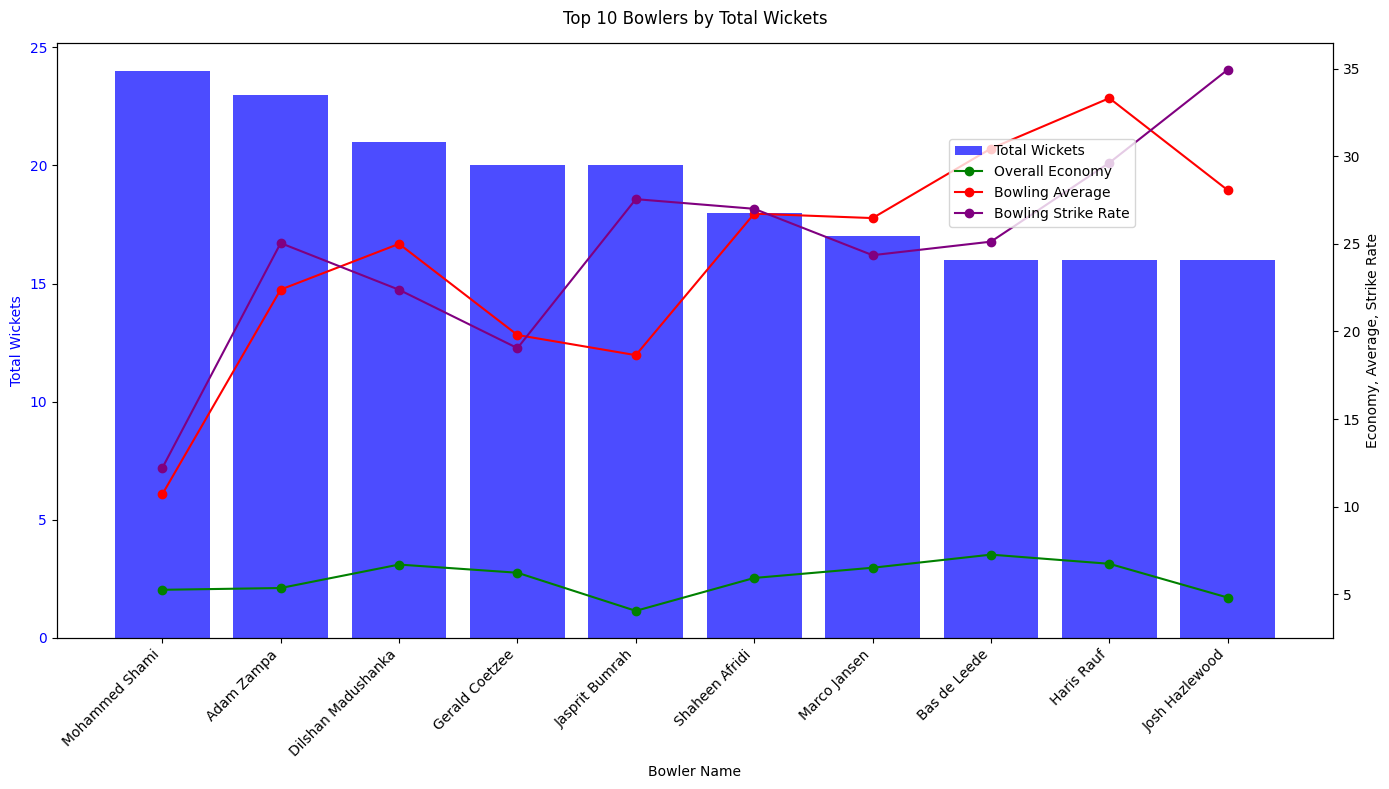

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Get top 10 bowlers by total wickets
top_bowlers = bowler_stat.nlargest(10, 'Total_Wickets')

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for total wickets
ax1.bar(top_bowlers['Bowler_Name'], top_bowlers['Total_Wickets'], color='blue', alpha=0.7, label='Total Wickets')
ax1.set_xlabel('Bowler Name')
ax1.set_ylabel('Total Wickets', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_bowlers['Bowler_Name'], rotation=45, ha='right')

# Line plot for economy, average, and strike rate
ax2 = ax1.twinx()
ax2.plot(top_bowlers['Bowler_Name'], top_bowlers['Overall_Economy'], color='green', marker='o', label='Overall Economy')
ax2.plot(top_bowlers['Bowler_Name'], top_bowlers['Bowling_Average'], color='red', marker='o', label='Bowling Average')
ax2.plot(top_bowlers['Bowler_Name'], top_bowlers['Bowling_Strike_Rate'], color='purple', marker='o', label='Bowling Strike Rate')

ax2.set_ylabel('Economy, Average, Strike Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and legend
fig.suptitle('Top 10 Bowlers by Total Wickets')
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), bbox_transform=ax1.transAxes)

# Show plot
plt.tight_layout()
plt.show()

<b>Selecting All rounders</b><br>
In this problem, we are given a list of players and then selection is based on particular conditions:<br>
To select all rounders we will merge both the datasets and find the bowlers with a certain amount of wicket , economy , etc <br>
but also has scored a certain runs with a certain average and a good strike rate down the order.<br>

In [103]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Batsmen.csv', encoding='unicode_escape')
df1 = pd.read_csv(r'C:\Users\DEBANJAN\Desktop\New folder\Bowler.csv', encoding='unicode_escape')
# Calculate bat_stat
bat_stat = df.groupby('Batsman_Name').agg({
    'Runs': 'sum',
    'Match_no': 'nunique',
    'Dismissal': lambda x: (x != 'not out').sum(),
    'Strike_Rate': lambda x: pd.to_numeric(x.replace('---', np.nan), errors='coerce').mean()
}).reset_index()

bat_stat['Batting_Average'] = bat_stat['Runs'] / bat_stat['Dismissal'].replace(0, np.inf)

bat_stat = bat_stat.rename(columns={
    'Runs': 'Total_Runs',
    'Match_no': 'Total_Matches_Played',
    'Strike_Rate': 'Batting_StrikeRate',
    'Dismissal': 'Outs'
})

# Convert overs to balls
def convert_overs_to_balls(overs):
    if isinstance(overs, str):
        parts = overs.split('.')
        if len(parts) == 2:
            return int(parts[0]) * 6 + int(parts[1])
        else:
            return int(parts[0]) * 6
    else:
        return int(overs) * 6

df1['Total_Balls'] = df1['Overs'].apply(convert_overs_to_balls)

# Aggregate the statistics for each bowler
bowler_stat = df1.groupby('Bowler_Name').agg({
    'Wickets': 'sum',
    'Total_Balls': 'sum',
    'Overs': lambda x: sum([int(o.split('.')[0]) for o in x.astype(str)]),  # Total overs bowled
    'Runs_given': 'sum'
}).reset_index()

bowler_stat['Overall_Economy'] = bowler_stat['Runs_given'] / (bowler_stat['Total_Balls'] / 6)
bowler_stat['Bowling_Average'] = bowler_stat['Runs_given'] / bowler_stat['Wickets'].replace(0, np.inf)
bowler_stat['Bowling_Strike_Rate'] = bowler_stat['Total_Balls'] / bowler_stat['Wickets'].replace(0, np.inf)

bowler_stat = bowler_stat.rename(columns={
    'Wickets': 'Total_Wickets',
    'Runs_given': 'Total_Runs_Given',
    'Overs': 'Total_Overs_Bowled'
})

# Merge datasets on 'Batsman_Name' (batsmen) and 'Bowler_Name' (bowlers)
allrounders = pd.merge(bat_stat, bowler_stat, left_on='Batsman_Name', right_on='Bowler_Name', how='inner')

# Drop duplicate columns and keep only relevant columns
allrounders = allrounders[['Batsman_Name', 'Total_Runs', 'Total_Matches_Played', 'Batting_StrikeRate', 'Batting_Average',
                           'Total_Wickets', 'Total_Balls', 'Total_Overs_Bowled', 'Total_Runs_Given',
                           'Overall_Economy', 'Bowling_Average', 'Bowling_Strike_Rate']]

# Display the first few rows of the new dataset
print(allrounders.head(5))


         Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
0          Adam Zampa          59                     7           74.304571   
1         Adil Rashid          92                     9           91.632556   
2         Agha Salman          51                     1          113.333000   
3       Aiden Markram         472                    10          141.043000   
4  Andile Phehlukwayo          39                     1          105.405000   

   Batting_Average  Total_Wickets  Total_Balls  Total_Overs_Bowled  \
0        14.750000             23          576                  96   
1        15.333333             15          474                  79   
2        51.000000              0           30                   5   
3        39.333333              1          108                  18   
4         0.000000              1           42                   7   

   Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
0               515        

<b>Conditions are :</b><br>
Minimum Runs: 200<br>
Minimum Strike Rate: 90<br>
Minimum Batting Average: 40<br>
Minimum Wickets Taken: 5<br>
Bowling Economy: Less than 6<br>

In [104]:
# Apply the specified filters
filtered_allrounders = allrounders[
    (allrounders['Total_Runs'] >= 200) &
    (allrounders['Batting_StrikeRate'] >= 90) &
    (allrounders['Batting_Average'] >= 45) &
    (allrounders['Total_Wickets'] >= 5) &
    (allrounders['Overall_Economy'] < 6)
]

# Display the filtered DataFrame
print(filtered_allrounders)


     Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
24  Glenn Maxwell         404                     9              95.602   

    Batting_Average  Total_Wickets  Total_Balls  Total_Overs_Bowled  \
24             50.5              6          408                  68   

    Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
24               330         4.852941             55.0                 68.0  


In at 6 : Glenn Maxwell (Higher batting average & overall economy less than 5)

<b>Lower Order AllRounder</b><br>
More intense conditions with a betterment in bowling but giving a good finish at the end.

In [105]:
lowerorder_allrounders = allrounders[
    (allrounders['Total_Runs'] >= 100) &
    (allrounders['Batting_StrikeRate'] >= 90) &
    (allrounders['Batting_Average'] >= 25) &
    (allrounders['Total_Wickets'] >= 4) &
    (allrounders['Overall_Economy'] < 8) &
    (allrounders['Bowling_Strike_Rate'] < 40)
]

# Display the filtered DataFrame
print(lowerorder_allrounders)

          Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
7   Azmatullah Omarzai         353                     8          100.360375   
48        Marco Jansen         183                     8           91.193500   
55    Mitchell Santner         103                     7          117.898429   
69         Pat Cummins         164                     8           93.573200   
74     Ravindra Jadeja         120                     5          106.021800   

    Batting_Average  Total_Wickets  Total_Balls  Total_Overs_Bowled  \
7         70.600000              7          228                  38   
48        26.142857             17          408                  68   
55        25.750000             16          552                  92   
69        27.333333             15          528                  88   
74        40.000000             16          552                  92   

    Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
7             

In [106]:
# Sort the DataFrame in decreasing order of batting average and increasing order of bowling strike rate
sorted_lowerorder_allrounders = lowerorder_allrounders.sort_values(by=['Batting_Average', 'Bowling_Strike_Rate'], ascending=[False, True])

# Display the sorted DataFrame
print(sorted_lowerorder_allrounders)

          Batsman_Name  Total_Runs  Total_Matches_Played  Batting_StrikeRate  \
7   Azmatullah Omarzai         353                     8          100.360375   
74     Ravindra Jadeja         120                     5          106.021800   
69         Pat Cummins         164                     8           93.573200   
48        Marco Jansen         183                     8           91.193500   
55    Mitchell Santner         103                     7          117.898429   

    Batting_Average  Total_Wickets  Total_Balls  Total_Overs_Bowled  \
7         70.600000              7          228                  38   
74        40.000000             16          552                  92   
69        27.333333             15          528                  88   
48        26.142857             17          408                  68   
55        25.750000             16          552                  92   

    Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
7             

In at 7 : Azmatullah Omarzai (Greater runs , batting average , and lower bowling strike rate)

<h1><b>Bowlers</b></h1>

Get the bowler_stat dataset

<b>Selection & Conditions</b><br>
1. Select the best spiner.<br>
2. 3 fast bowlers (More wickets , lesser bowling strike rate , lesser bowling average )

In [107]:
bowler_stat.columns

Index(['Bowler_Name', 'Total_Wickets', 'Total_Balls', 'Total_Overs_Bowled',
       'Total_Runs_Given', 'Overall_Economy', 'Bowling_Average',
       'Bowling_Strike_Rate'],
      dtype='object')

In [108]:
# Apply filter for total wickets greater than 20
filtered_bowler_stat = bowler_stat[bowler_stat['Total_Wickets'] >= 20]

# Sort the DataFrame
sorted_bowler_stat = filtered_bowler_stat.sort_values(by=['Bowling_Average','Bowling_Strike_Rate'], 
                                                      ascending=[True, True])

# Display the sorted DataFrame
print(sorted_bowler_stat.head(50))

           Bowler_Name  Total_Wickets  Total_Balls  Total_Overs_Bowled  \
63      Mohammed Shami             24          288                  48   
33      Jasprit Bumrah             20          546                  91   
23      Gerald Coetzee             20          378                  63   
0           Adam Zampa             23          576                  96   
18  Dilshan Madushanka             21          462                  77   

    Total_Runs_Given  Overall_Economy  Bowling_Average  Bowling_Strike_Rate  
63               257         5.354167        10.708333            12.000000  
33               373         4.098901        18.650000            27.300000  
23               396         6.285714        19.800000            18.900000  
0                515         5.364583        22.391304            25.043478  
18               525         6.818182        25.000000            22.000000  


<b>Top 4 bowlers:</b><br>
1.Mohammad Shami<br>
2.Jasprit Bumrah<br>
3.Gerald Coetzee<br>
4.Adam Zampa (Spinner)<br>
<br>
12th Man : Dilshan Madushanka<br>

<h1><b>FINAL 11</b></h1><br>
<h2>Team Members:</h2>
<ul>1. Quinton de Kock (WC)<br>
2. Rohit Sharma(C)<br>
3. Virat Kohli<br>
4. Shreyas Iyer<br>
5. Daryl Mitchell<br>
6. Glenn Maxwell<br>
7. Azmatullah Omarzai<br>
8.Adam Zampa<br>
9.Mohammad Shami<br>
10.Jasprit Bumrah<br>
11.Gerald Coetzee<br>
</ul><br>
<b>12th Man:</b> Dilshan Madushanka


<h1>ICC Best 11</h1>

<h2>Players:</h2>
<ul>
    <li>Quinton de Kock (wk)</li>
    <li>Rohit Sharma (c)</li>
    <li>Virat Kohli</li>
    <li>Daryl Mitchell</li>
    <li>KL Rahul</li>
    <li>Glenn Maxwell</li>
    <li>Ravindra Jadeja</li>
    <li>Jasprit Bumrah</li>
    <li>Dilshan Madushanka</li>
    <li>Adam Zampa</li>
    <li>Mohammed Shami</li>
</ul>

<h2>12th Player:</h2>
<ul>
    <li>Gerald Coetzee</li>
</ul>


<h1>Percentage Similarity Calculation</h1>

<p>Number of identical players: 9</p>
<p>Total number of players in the ICC Best 11 (including the 12th player): 12</p>

Percentage similarity: ((9 / 12) * 100)% = 75 %

Therefore, including the 12th player from both lists, the percentage similarity between your best 11 and the ICC Best 11 is 75%.

